# Zestaw 10. Dyskretna Transformacja Fouriera

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
SIGNAL_COLOR = "#8390fa"

## 1. FFT

<i>1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera F i n-elementowego wektora wejściowego (y = Fx). </i>

In [57]:
def F(n):
    ksi = np.exp(-2*np.pi*1j/n)
    return np.array([[ksi**(j * k) for j in range(n)] 
                   for k in range(n)], dtype=complex)

In [58]:
def dft(x):
    n = len(x)
    assert n & (n-1) == 0
    return F(n) @ x

<i>2. Zaimplementuj również IDFT korzystając z podanej tożsamości. </i>

In [59]:
def idft(x):
    n = len(x)
    return np.conjugate(F(n))@x/n

<i>Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej. </i>

In [60]:
np.set_printoptions(formatter={'float_kind': '{:.2f}'.format, 'complex_kind': '{:.2f}'.format})

In [61]:
x = list(np.random.rand(8))

y = dft(x)
y_numpy = np.fft.fft(x)

print('x: ', np.array(x))

print('\n----DFT----')
print('\ny:\t', y)
print('numpy y:\t', y_numpy)

print('\n----IDFT----')
inv_x = idft(y)
print('\nx:\t', inv_x)
print('numpy x:\t', np.round(np.fft.ifft(y_numpy), 3))

print('\ncorrect? ', np.allclose(y, y_numpy) and np.allclose(x, inv_x))

x:  [0.18 0.41 0.96 0.27 0.09 0.64 0.25 0.48]

----DFT----

y:	 [3.29+0.00j 0.09-0.39j -0.94-0.30j 0.11+1.02j -0.33-0.00j 0.11-1.02j
 -0.94+0.30j 0.09+0.39j]
numpy y:	 [3.29+0.00j 0.09-0.39j -0.94-0.30j 0.11+1.02j -0.33+0.00j 0.11-1.02j
 -0.94+0.30j 0.09+0.39j]

----IDFT----

x:	 [0.18-0.00j 0.41-0.00j 0.96-0.00j 0.27-0.00j 0.09+0.00j 0.64+0.00j
 0.25+0.00j 0.48+0.00j]
numpy x:	 [0.18+0.00j 0.41+0.00j 0.96+0.00j 0.27+0.00j 0.09+0.00j 0.64+0.00j
 0.25+0.00j 0.48+0.00j]

correct?  True


Otrzymane wyniki zgadzają się z tymi otrzymanymi z wykorzystaniem funkcji bibliotecznej, jak również wektor otrzymany po zastosowaniu odwrotnej transformaty na wektorze wynikowym dft jest tożsamy z wyjściowym. 

<i>3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). </i>

Szybka transformacja Fouriera wykorzystuje strategię "dziel i rządź" do znalezienia dyskretnej transformaty Fouriera w czasie liniowo logarytmicznym zamiast kwadratowym:

In [62]:
def fft(x):
    n = len(x)
    if n == 1:
        return x
    
    part1 = fft(x[::2])
    part2 = fft(x[1::2])
    
    for k in range(n//2):
        p = part1[k]
        q = np.exp(-2*np.pi*1j*k/n)*part2[k]
        part1[k] = p + q
        part2[k] = p - q
        
    return np.concatenate((part1, part2))

In [63]:
print('implemented dft:\t', dft(x))
print('\n      numpy fft:\t', np.fft.fft(x))
print('\nimplemented fft:\t', fft(x))
print('\ncorrect? ', np.allclose(fft(x), np.fft.fft(x)))

implemented dft:	 [3.29+0.00j 0.09-0.39j -0.94-0.30j 0.11+1.02j -0.33-0.00j 0.11-1.02j
 -0.94+0.30j 0.09+0.39j]

      numpy fft:	 [3.29+0.00j 0.09-0.39j -0.94-0.30j 0.11+1.02j -0.33+0.00j 0.11-1.02j
 -0.94+0.30j 0.09+0.39j]

implemented fft:	 [3.29+0.00j 0.09-0.39j -0.94-0.30j 0.11+1.02j -0.33+0.00j 0.11-1.02j
 -0.94+0.30j 0.09+0.39j]

correct?  True


<i>Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz F dla danych
o różnym rozmiarze. </i>

In [492]:
def compare_fft_times():
    fft_times = []
    dft_times = []
    numpy_times = []
    ns = []
    
    for i in range(1, 10):
        n = 2**i
        ns.append(n)
        x = list(np.random.rand(n))
        start = time()
        fft(x)
        end = time()
        fft_times.append(end-start)
        
        start = time()
        dft(x)
        end = time()
        dft_times.append(end-start)
        
        start = time()
        np.fft.fft(x)
        end = time()
        numpy_times.append(end-start)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(ns, fft_times, label='fft', color='#e5989b', lw=5)
    ax.plot(ns, dft_times, label='dft', color='#6d6875', lw=5)
    ax.plot(ns, numpy_times, label='numpy fft', color='#b5838d', lw=5)
    
    ax.set_ylabel('time (s)')
    ax.set_xlabel('n - vector length')
    ax.legend()

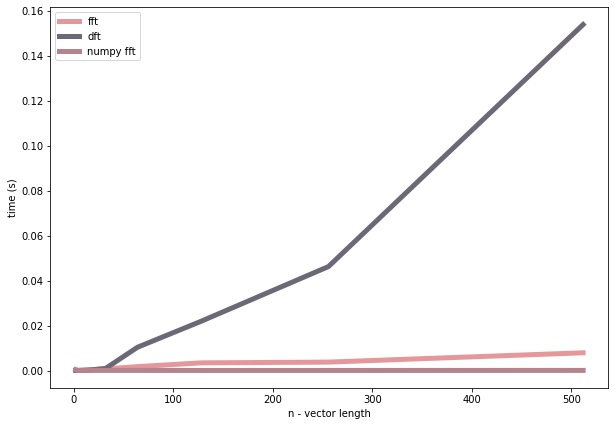

In [493]:
compare_fft_times()

Otrzymane wyniki wskazują, iż metoda DFT z mnożeniem wektora przez macierz jest dużo wolniejsza od metody FFT, chociaż jak najbardziej możemy z niej skorzystać dla wektorów o rozsądnych rozmiarach. 

Otrzymane wyniki potwierdzają oszacowane złożoności powyższych metod. Zwykła metoda DFT ma złożoność kwadratową, a FFT liniowo-logarytmiczną.

Spośród implementacji metody szybkiej transformaty Fouriera, szybsza okazała się, zgodnie z przypuszczeniami, ta z biblioteki numpy. Najpewniej jest ona skutecznie zoptymalizowana pod względem czasowym.

## 2. DFT w 1D 

* <i>Wygeneruj dwa sygnały czasowo-amplitudowe:</i>

<i>a) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach</i>

In [494]:
def gen_signal_a(num_periods=1):
    x = np.linspace(0, num_periods*2*np.pi, 1024)
    signals = [np.sin(i*x) for i in range(1, 6)]
    
    fig, ax = plt.subplots(2, 1, figsize=(20, 10))
    for signal in signals:
        ax[0].plot(x, signal)
    
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('y')
    ax[0].set_title('individual signals')
    
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('y')
    ax[1].set_title('sum signal')
    
    sum_signal = np.sum(signals, axis=0)
    ax[1].plot(x, sum_signal, color=SIGNAL_COLOR, lw=4)
    return x, sum_signal

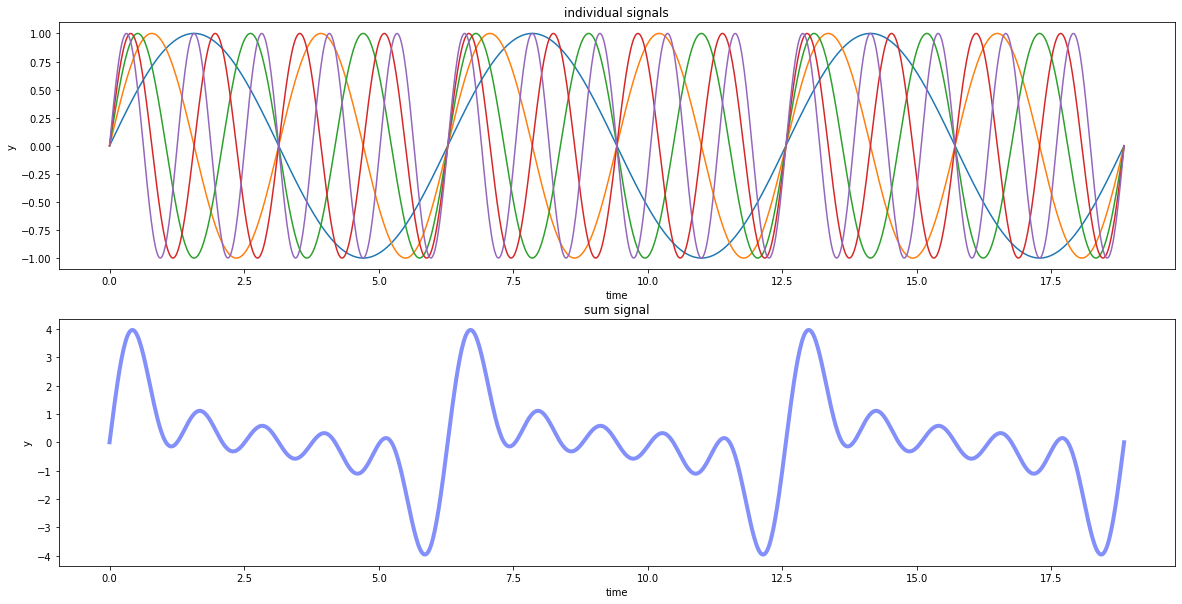

In [495]:
x_a, signal_a = gen_signal_a(3)

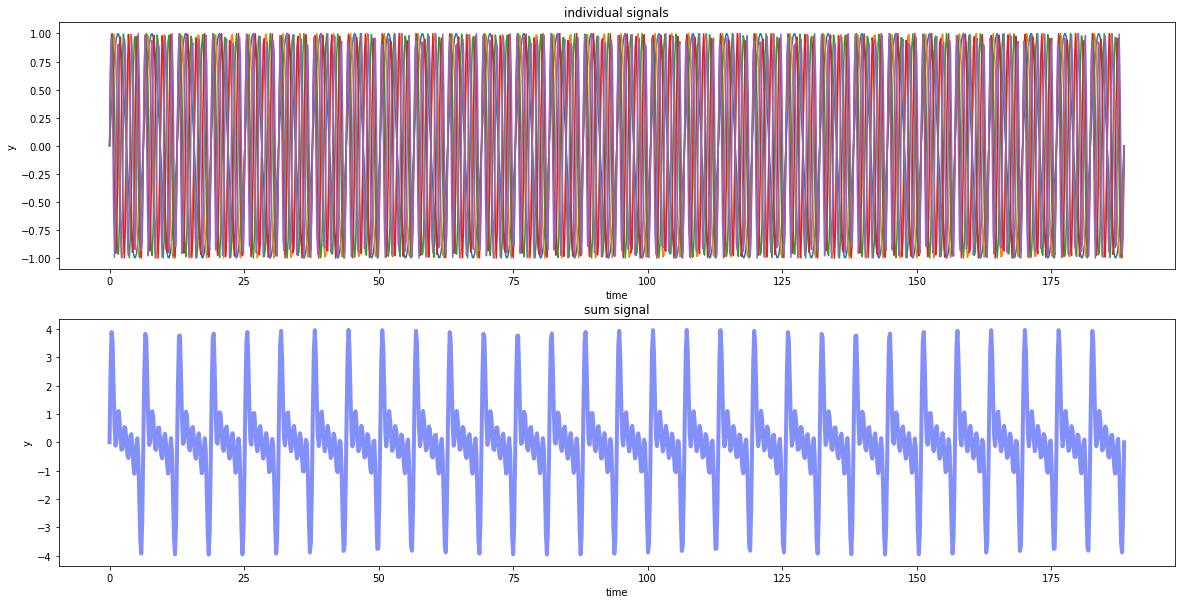

In [496]:
x_a, signal_a = gen_signal_a(30)

<i>b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości </i>

In [497]:
def gen_signal_b(num_periods):
    x = np.linspace(0, num_periods*2*np.pi, 1020)
    interval = len(x)//5
    
    signals = np.array([np.sin(i*x[(i-1)*interval:i*interval]) for i in range(1, 6)])
    
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    for i, signal in enumerate(signals):
        ax[0].plot(x[i*interval:(i+1)*interval], signal)
    
    
    signal = signals.flatten()
    ax[1].plot(x, signal, color=SIGNAL_COLOR, lw=4)
    
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('y')
    ax[0].set_title('individual signals')
    
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('y')
    ax[1].set_title('sum signal')
        
    return x, signal

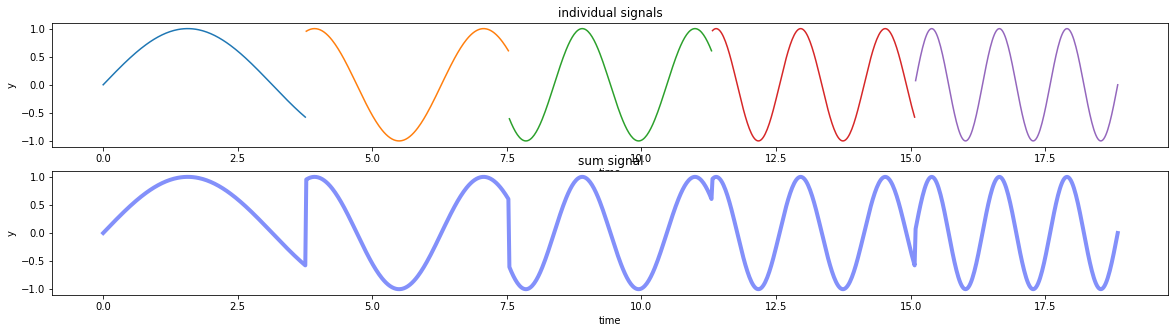

In [498]:
x_b, signal_b = gen_signal_b(3)

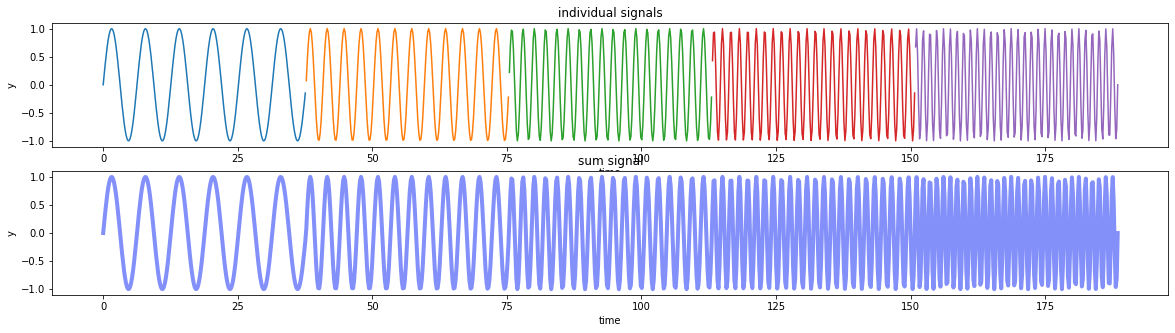

In [499]:
x_b, signal_b = gen_signal_b(30)

* <i>Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji. </i>

In [500]:
def transform(x, signal):
    transformed_signal = fft(np.array(signal, dtype=complex))
    
    fig, ax = plt.subplots(2, 1, figsize=(20, 20))
    ax[0].plot(x, np.real(transformed_signal), color='#ff6d00', lw=2)
    ax[1].plot(x, np.imag(transformed_signal), color='#ff9e00', lw=2)
    
    ax[0].set_xlabel('frequency')
    ax[0].set_ylabel('y')
    ax[0].set_title('real part')
    
    ax[1].set_xlabel('frequency')
    ax[1].set_ylabel('y')
    ax[1].set_title('imaginary part')
    plt.show()

* a)

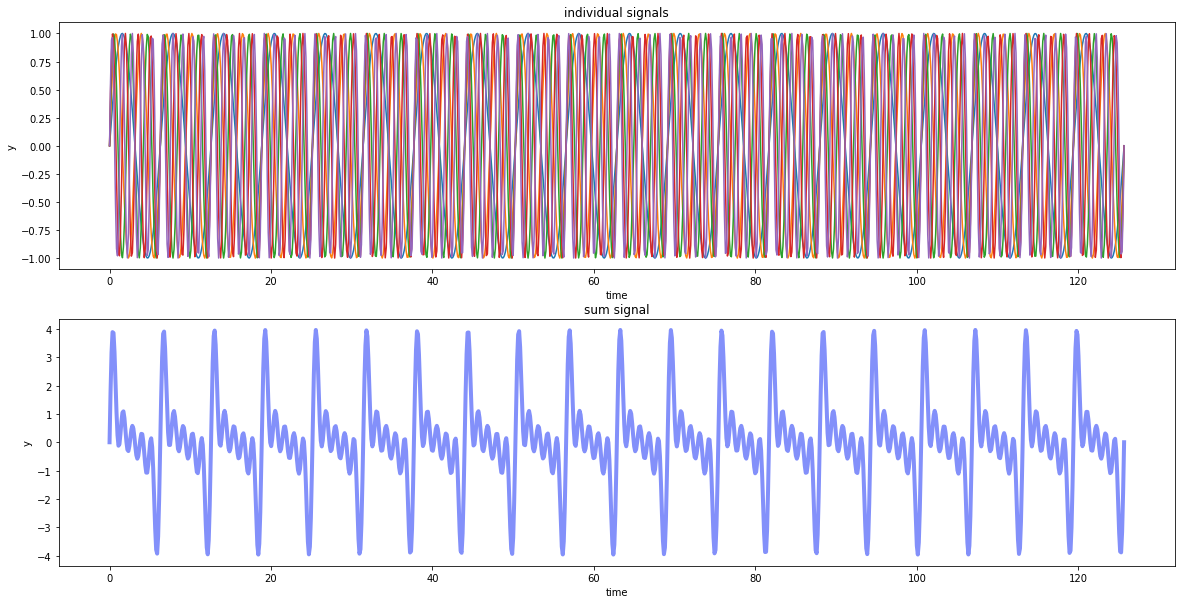

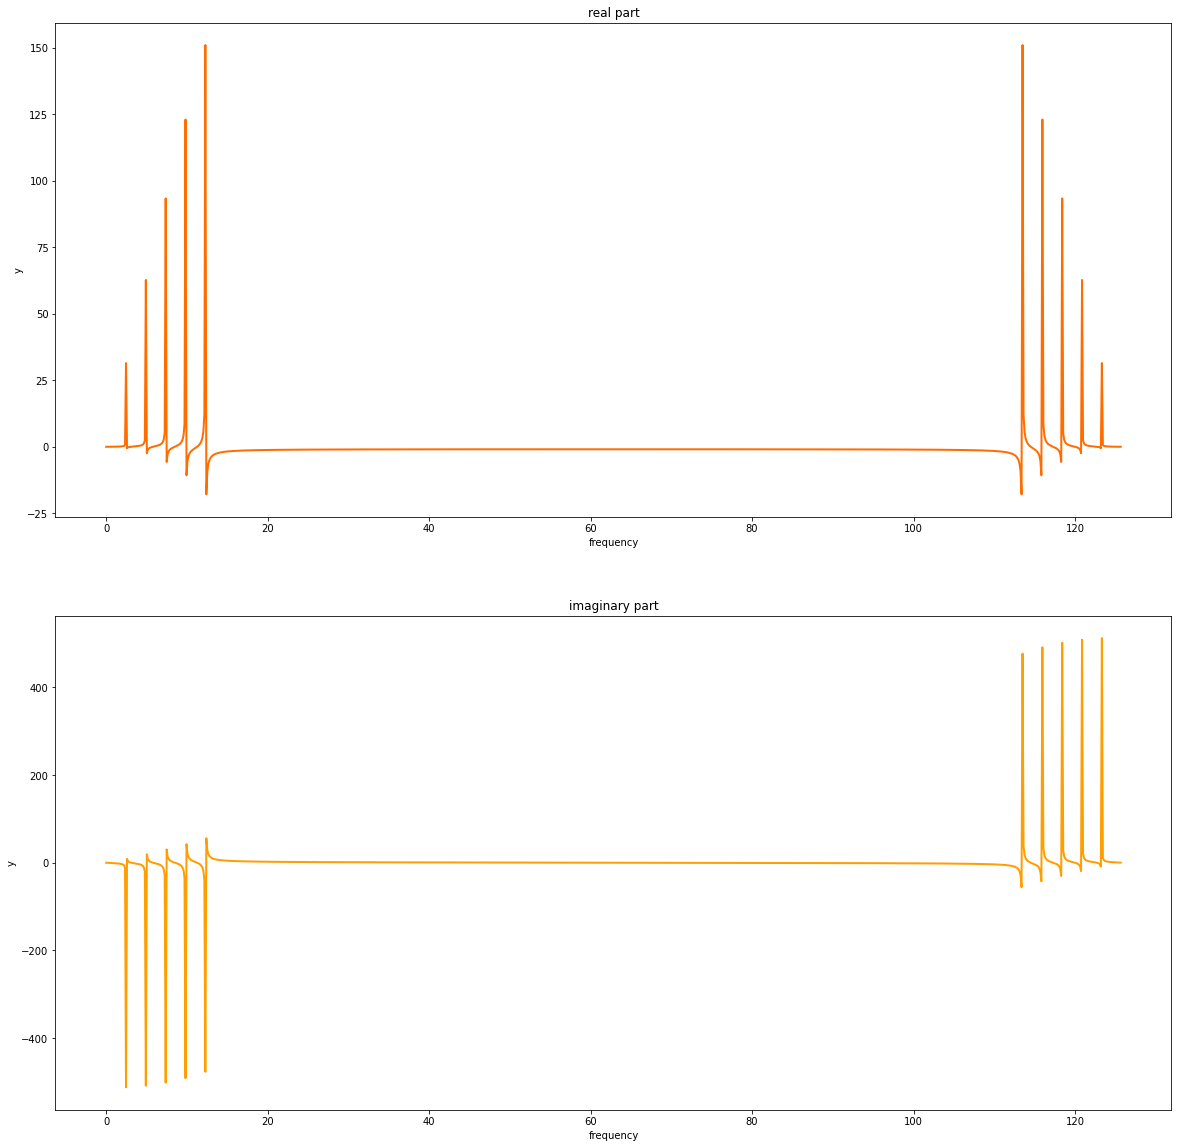

In [501]:
transform(*gen_signal_a(20))

Zarówno na wykresie części rzeczywistej wartości otrzymanych poprzez zastosowanie transformaty Fouriera, jak i zespolonej, możemy zaobserwować bardzo dobrze widoczne punkty (obszary), w których przyjmuje ona ekstremalne wartości. Dla powyższego sygnału istnieją 2 obszary po 5 punktów. Odpowiadają one częstotliwościom składowych sygnałów, których było 5, a wartości ich częstotliwości były rozłożone równomiernie, co zgadza się na wykresie. Charakterystyczny obszar z punktami po prawej stronie bierze się z charakterystyki funkcji trygonometrycznych, a konkretniej tego, iż okres/częstotliwość sygnału moglibyśmy zadać także liczbą ujemną, co prowadziłoby do analogicznej funkcji. W związku z tym oba obszary na wykresie korespondują z tymi samymi pięcioma sygnałami składowymi.

* b)

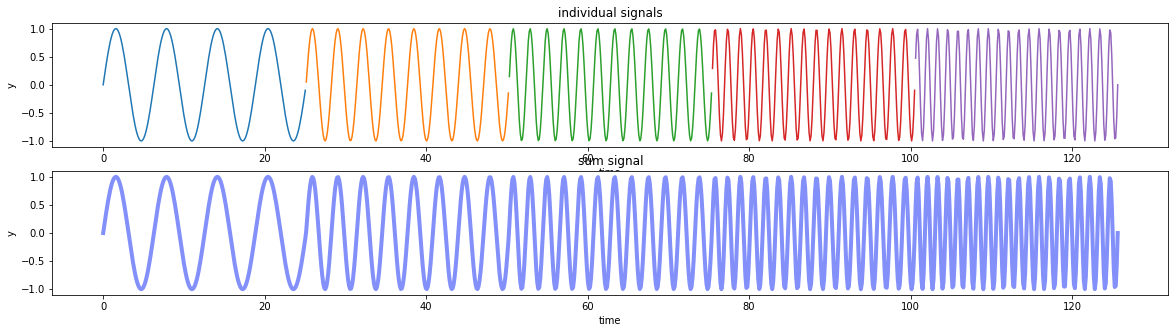

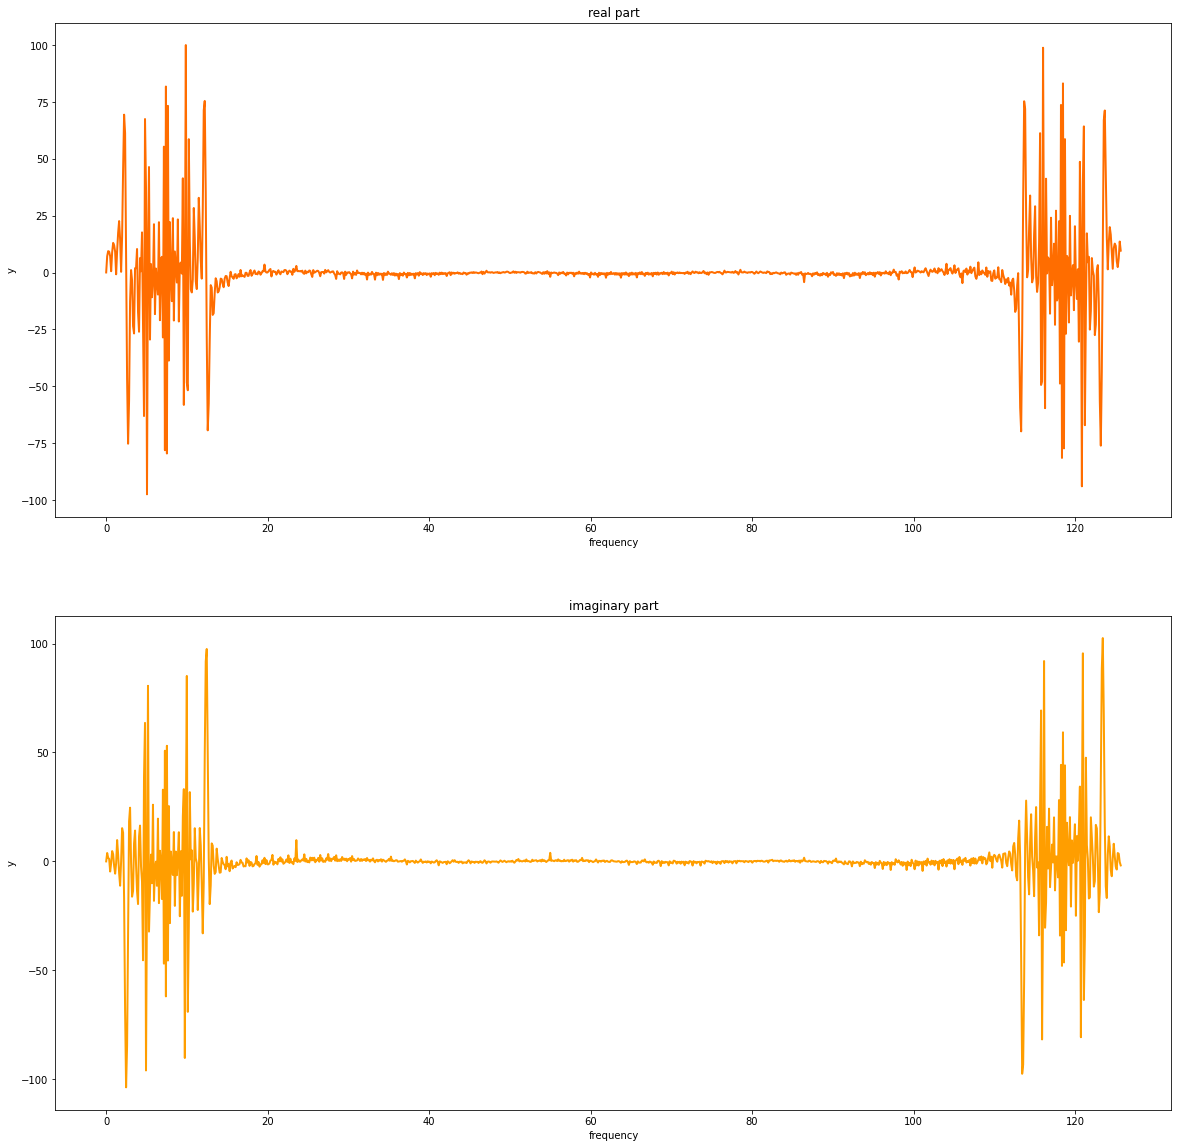

In [502]:
transform(*gen_signal_b(20))

Przypadek, w którym sygnały były ostawione przedziałami, okazał się niekorzystny dla powyższej metody. Jesteśmy w stanie zaobserwować charakterystyczne zwiększenia wartości w tych punktach, co poprzednio, ale jest to dużo słabiej widoczne.

## Wnioski

- Metody DFT i FFT są sobie równoważne, jeśli chodzi o generowane wyniki transformacji, różnią się jedynie sposobem wyliczania transformaty oraz złożonością obliczeniową. Szybka transformata Fouriera, zgodnie z nazwą, działa szybciej.
- Transformata Fouriera pozwala rozłożyć sygnał o dowolnym kształcie na sumę sygnałów sinusoidalnych. Aplikując transformatę do sygnału, jesteśmy w stanie zaobserwować częstotliwości tych sygnałów składowych.
- Transformacja Fouriera jest bardzo często wykorzystywana w wielu dziedzinach nauki, np. w przetwarzaniu sygnałów, przy równaniach różniczkowych, w rezonansie magnetycznym itd.

M. Hawryluk 09.06.2021